In [5]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [6]:
IMAGE_PATH = "C:\\Users\\Admin\\Downloads\\why-are-number-plates-yellow-and-white.jpg"
#IMAGE_PATH = 'surf.jpeg'

In [7]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[206, 66], [264, 66], [264, 114], [206, 114]], 'eis', 0.9537115927475056),
 ([[389, 275], [491, 275], [491, 293], [389, 293]],
  'GLA2s0',
  0.6810084197917923),
 ([[699, 279], [769, 279], [769, 295], [699, 295]],
  '@MAIC',
  0.2037971280697647),
 ([[468, 331], [695, 331], [695, 391], [468, 391]],
  'SN66 XMZ',
  0.834486637911075)]

Largest detection: SN66 XMZ (Area: 13620)


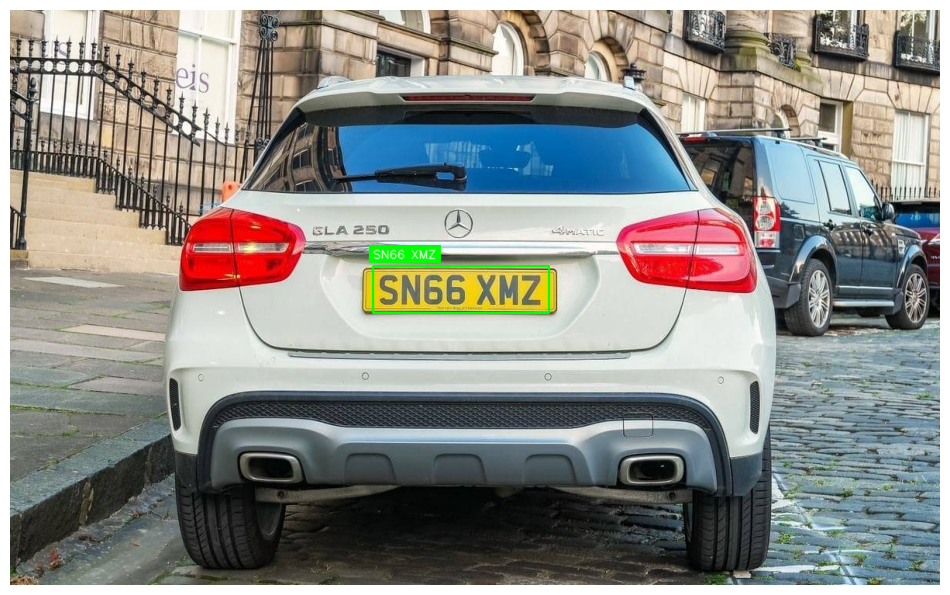

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
img = cv2.imread(IMAGE_PATH)
if img is None:
    raise ValueError("Image not found at the specified path")

# Convert BGR to RGB for matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 1
text_color = (255, 255, 255)  # White text
bg_color = (0, 255, 0)  # Green background
padding = 5  # Space around text

# Variables to track the largest detection
largest_area = 0
largest_detection = None

for detection in result:
    # Ensure coordinates are integers
    top_left = tuple(map(int, detection[0][0]))
    bottom_right = tuple(map(int, detection[0][2]))
    
    # Calculate area of the rectangle
    width = bottom_right[0] - top_left[0]
    height = bottom_right[1] - top_left[1]
    area = width * height
    
    # Update largest detection if current is larger
    if area > largest_area:
        largest_area = area
        largest_detection = detection

# Only draw the largest detection if one was found
if largest_detection is not None:
    top_left = tuple(map(int, largest_detection[0][0]))
    bottom_right = tuple(map(int, largest_detection[0][2]))
    text = largest_detection[1]

    # Draw rectangle around detection
    cv2.rectangle(img_rgb, top_left, bottom_right, (0, 255, 0), 2)

    # Calculate text size and position
    (text_width, text_height), baseline = cv2.getTextSize(
        text, font, font_scale, font_thickness
    )

    # Calculate text position (above the detection box)
    text_x = top_left[0]
    text_y = top_left[1] - 10  # 10 pixels above the detection

    # If text would go off the top of the image, place it below instead
    if text_y - text_height - padding < 0:
        text_y = bottom_right[1] + text_height + 10

    # Calculate background rectangle coordinates
    bg_top_left = (text_x - padding, text_y - text_height - padding)
    bg_bottom_right = (text_x + text_width + padding, text_y + padding)

    # Ensure background stays within image bounds
    bg_top_left = (
        max(0, bg_top_left[0]),
        max(0, bg_top_left[1])
    )
    bg_bottom_right = (
        min(img_rgb.shape[1] - 1, bg_bottom_right[0]),
        min(img_rgb.shape[0] - 1, bg_bottom_right[1])
    )

    # Draw background rectangle for text
    cv2.rectangle(
        img_rgb,
        bg_top_left,
        bg_bottom_right,
        bg_color,
        -1  # Filled rectangle
    )

    # Put text (adjust position if we modified the background)
    text_x = bg_top_left[0] + padding
    text_y = bg_bottom_right[1] - padding

    cv2.putText(
        img_rgb,
        text,
        (text_x, text_y),
        font,
        font_scale,
        text_color,
        font_thickness,
        cv2.LINE_AA
    )

    print(f"Largest detection: {text} (Area: {largest_area})")

# Display image
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()